# Competencia: Santander Customer Satisfaction

Desde los cargos de atención al cliente, hasta en los cargos directivos la satisfacción del cliente es una de las principales métricas de éxito. Los clientes insatisfechos no se mantienen por mucho tiempo, y mas aún, los clientes insatisfechos no demuestran su insatisfacción sino hasta que ya han dejado la compañia.

El Banco Santander le esta solciitando a la comunidad de Kaggle que le ayude a identificar a los clientes insatisfechos en una etapa temprana de la relación comercial. Hacerlo le permitirá a Santander tomar medidas preventivas para mejorar la satisfacción de sus clientes antes de que sea demasiado tarde.

En esta competencia usted trabajrá con cientos de características anonimizadas para predecir si un cliente está o no satisfecho con su experiencia bancaria.

## Grupo de trabajo

- John Franklin Gonzalez Gamboa - 201725981
- Jorge Eduardo Rodriguez Cardozo - 200711501
- German Augusto Carvajal Murcia - 201313516

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

os.chdir(os.getcwd()+'/Santander')
df = pd.read_csv('../Santander/Features.csv')
f = pd.read_csv('../Santander/Target.csv')
df['TARGET'] = f

C:\Users\JORGE\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# set a seed for reproducibility
np.random.seed(1234)
df=df.sample(n=df.shape[0],replace=False)

In [3]:
pd.DataFrame.head(df)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
59351,2.0,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59162.250000,0
8508,2.0,59.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54396.660000,0
25516,2.0,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
42971,2.0,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
69820,2.0,29.186663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79066.494609,1


# K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

# 5-fold Logistic Regression

In [4]:
np.random.seed(1234)

# Create k-folds
from sklearn.cross_validation import KFold
kf = KFold(df.shape[0], n_folds=5, random_state=0)

results = []

for train_index, test_index in kf:
    df_train, df_test = df.iloc[train_index], df.iloc[test_index]
    
    # train a logistic regression model
    logreg = LogisticRegression(penalty='l1', solver='liblinear')
    logreg.fit(df_train.loc[:, df_train.columns != 'TARGET'], df_train.TARGET)

    # make predict y proba for testing set
    y_pred_class = logreg.predict(df_test.loc[:, df_test.columns != 'TARGET'])
    y_pred_prob = logreg.predict_proba(df_test.loc[:, df_test.columns != 'TARGET'])[:, 1]

    # calculate AUC
    results.append(metrics.roc_auc_score(df_test.TARGET, y_pred_prob))



(count    5.000000
 mean     0.839074
 std      0.002490
 min      0.835157
 25%      0.838287
 50%      0.839966
 75%      0.840354
 max      0.841606
 dtype: float64,
 [<matplotlib.lines.Line2D at 0x220d6fcd9e8>])

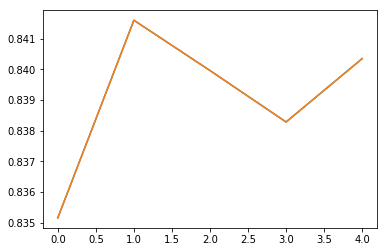

In [5]:
pd.Series(results).describe(), pd.Series(results).plot(), plt.plot(results)

0.8403537123440815


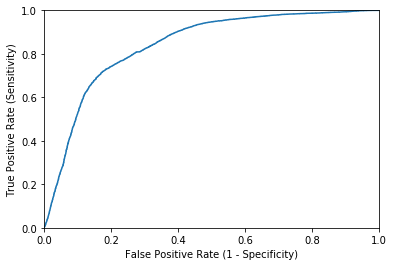

In [6]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(df_test.TARGET, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print(metrics.roc_auc_score(df_test.TARGET, y_pred_prob))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002208E71DFD0>,
      dtype=object)

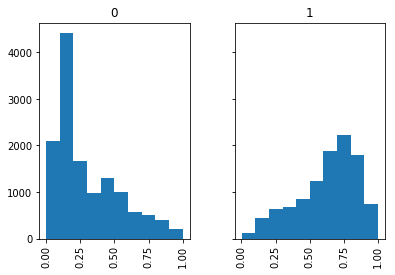

In [7]:
# histogram of predicted probabilities grouped by actual response value
prob1 = pd.DataFrame({'probability':y_pred_prob, 'actual':df_test.TARGET})
prob1.hist(column='probability', by='actual', sharex=True, sharey=True)

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_test.TARGET, y_pred_class)

array([[10434,  2649],
       [ 2714,  7868]], dtype=int64)

# Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
rfclas = GradientBoostingClassifier()

## Learning rate

Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [10]:
# list of values to try for learning_rate
learning_rate = np.array([0.1, 0.3, 0.4, 0.5])

# list to store the AUC for each value of learning_rate
AUC_scores = []

# use 3-fold cross-validation with each value of learning_rate
for learning in learning_rate:
    gboost = GradientBoostingClassifier(learning_rate = learning, random_state=1)
    ROC_AUC_scores = cross_val_score(gboost, df.loc[:, df.columns != 'TARGET'], df.TARGET, cv=3, scoring='roc_auc')
    AUC_scores.append(np.mean(ROC_AUC_scores))

Text(0,0.5,'AUC (Higher is better)')

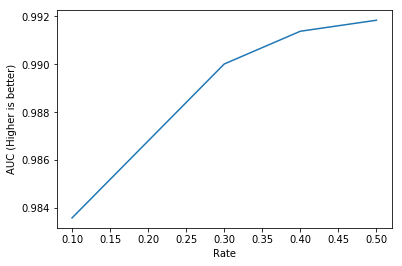

In [11]:
# plot learning_rate (x-axis) versus AUC
plt.plot(learning_rate, AUC_scores)
plt.xlabel('Rate')
plt.ylabel('AUC (Higher is better)')

## N estimators

The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

In [12]:
# list of values to try for n_estimators
n_estimators = range(40, 200, 20)

# list to store the AUC for each value of n_estimators
AUC_scores = []

# use 3-fold cross-validation with each value of n_estimators
for estimators in n_estimators:
    gboost = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = estimators, random_state=1)
    ROC_AUC_scores = cross_val_score(gboost, df.loc[:, df.columns != 'TARGET'], df.TARGET, cv=3, scoring='roc_auc')
    AUC_scores.append(np.mean(ROC_AUC_scores))

Text(0,0.5,'AUC (Higher is better)')

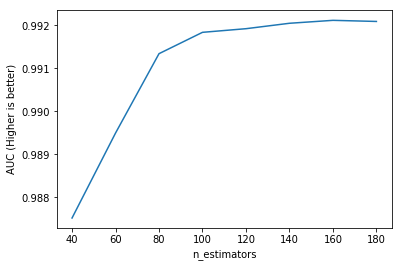

In [13]:
# plot learning_rate (x-axis) versus AUC
plt.plot(n_estimators, AUC_scores)
plt.xlabel('n_estimators')
plt.ylabel('AUC (Higher is better)')

## Max depth

Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

In [14]:
# list of values to try for max_depth
max_depth = range(1, 6, 1)

# list to store the AUC for each value of max_depth
AUC_scores = []

# use 3-fold cross-validation with each value of max_depth
for depth in max_depth:
    gboost = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 100, max_depth = depth, random_state=1)
    ROC_AUC_scores = cross_val_score(gboost, df.loc[:, df.columns != 'TARGET'], df.TARGET, cv=5, scoring='roc_auc')
    AUC_scores.append(np.mean(ROC_AUC_scores))

Text(0,0.5,'AUC (Higher is better)')

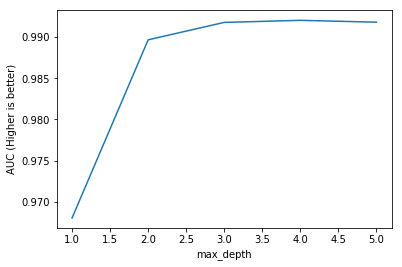

In [15]:
# plot max_depth (x-axis) versus AUC
plt.plot(max_depth, AUC_scores)
plt.xlabel('max_depth')
plt.ylabel('AUC (Higher is better)')

### Fitting a Gradient Boosting with the best parameters

In [16]:
gboost = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 100, max_depth = 3, random_state=1)
ROC_AUC_scores = cross_val_score(gboost, df.loc[:, df.columns != 'TARGET'], df.TARGET, cv=5, scoring='roc_auc')

count    5.000000
mean     0.991801
std      0.000388
min      0.991282
25%      0.991516
50%      0.991957
75%      0.992037
max      0.992214
dtype: float64

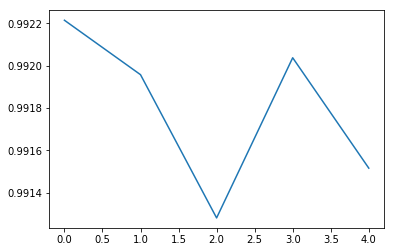

In [17]:
#Resultados de los mejores parámetros para comparar con los otros modelos
plt.plot(ROC_AUC_scores)
pd.Series(ROC_AUC_scores).describe()

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfclas = RandomForestClassifier()

## Tuning n_estimators
One important tuning parameter is n_estimators, which is the number of trees that should be grown. It should be a large enough value that the error seems to have "stabilized".

### Tuning n_estimators (trees)

In [19]:
# list of values to try for n_estimators (trees)
estimator_range = range(10, 200, 20)

# list to store the AUC for each value of n_estimators
AUC_scores = []

# use 3-fold cross-validation with each value of n_estimators
for estimator in estimator_range:
    rfclas = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    ROC_AUC_scores = cross_val_score(rfclas, df.loc[:, df.columns != 'TARGET'], df.TARGET, cv=3, scoring='roc_auc')
    AUC_scores.append(np.mean(ROC_AUC_scores))



Text(0,0.5,'AUC (Higher is better)')

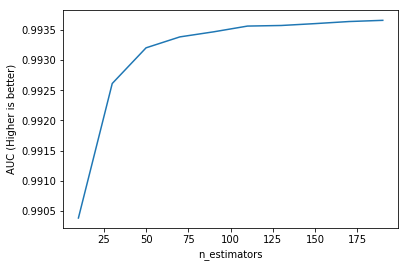

In [20]:
# plot n_estimators (x-axis) versus AUC (y-axis)
plt.plot(estimator_range, AUC_scores)
plt.xlabel('n_estimators')
plt.ylabel('AUC (Higher is better)')

### Max Features

In [21]:
# list of values to try for max_features
feature_range = range(1, 30, 1)

# list to store the average AUC for each value of max_features
AUC_scores = []

# use 3-fold cross-validation with each value of max_features
for feature in feature_range:
    rfclas = RandomForestClassifier(n_estimators=100, max_features=feature, random_state=1, n_jobs=-1)
    ROC_AUC_scores = cross_val_score(rfclas, df.loc[:, df.columns != 'TARGET'], df.TARGET, cv=3, scoring='roc_auc')
    AUC_scores.append(np.mean(ROC_AUC_scores))

Text(0,0.5,'AUC (Higher is better)')

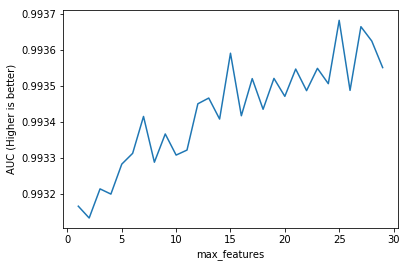

In [22]:
# plot max_features (x-axis) versus AUC (y-axis)
plt.plot(feature_range, AUC_scores)
plt.xlabel('max_features')
plt.ylabel('AUC (Higher is better)')

### Max Depth

In [23]:
# list of values to try for max_depth
depth_range = range(1, 30, 2)

# list to store the average AUC for each value of max_depth
AUC_scores = []

# use 3-fold cross-validation with each value of max_depth
for depth in depth_range:
    rfclas = RandomForestClassifier(n_estimators=100, max_features= 30, max_depth = depth, random_state=1, n_jobs=-1)
    ROC_AUC_scores = cross_val_score(rfclas, df.loc[:, df.columns != 'TARGET'], df.TARGET, cv=3, scoring='roc_auc')
    AUC_scores.append(np.mean(ROC_AUC_scores))

Text(0,0.5,'AUC (Higher is better)')

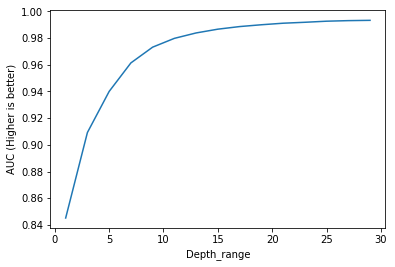

In [24]:
# plot max_depth (x-axis) versus AUC (y-axis)
plt.plot(depth_range, AUC_scores)
plt.xlabel('Depth_range')
plt.ylabel('AUC (Higher is better)')

### Fitting a Random Forest with the best parameters

In [25]:
rfclas = RandomForestClassifier(n_estimators=100, max_features=30, max_depth = 30, random_state=1, n_jobs=-1)
ROC_AUC_scores = cross_val_score(rfclas, df.loc[:, df.columns != 'TARGET'], df.TARGET, cv=10, scoring='roc_auc')

count    10.000000
mean      0.994119
std       0.000403
min       0.993591
25%       0.993867
50%       0.994002
75%       0.994408
max       0.994850
dtype: float64

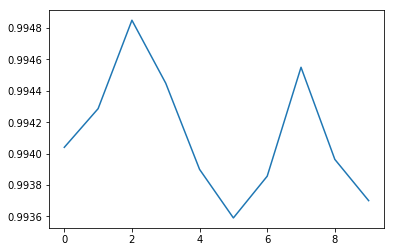

In [26]:
#Resultados de los mejores parámetros para comparar con los otros modelos
plt.plot(ROC_AUC_scores)
pd.Series(ROC_AUC_scores).describe()

In [27]:
test = pd.read_csv('../Santander/Data_test.csv')
pd.DataFrame.head(test)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2.0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,2.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,2.0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,2.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,2.0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [28]:
logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(df_train.loc[:, df_train.columns != 'TARGET'], df_train.TARGET)
ypredlogreg = logreg.predict(test)

In [29]:
gboost = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 100, max_depth = 3, random_state=1)
gboost.fit(df_train.loc[:, df_train.columns != 'TARGET'], df_train.TARGET)
ypredgboos = gboost.predict(test)

In [30]:
rfclas = RandomForestClassifier(n_estimators=100, max_features=30, max_depth = 30, random_state=1, n_jobs=-1)
rfclas.fit(df.loc[:, df.columns != 'TARGET'], df.TARGET)
ypredrfclas = rfclas.predict(test)

In [32]:
test['ypredlogreg'] = ypredlogreg
test['ypredgboost'] = ypredgboos
test['ypredrfclas'] = ypredrfclas
test.to_csv('modelos.csv', index=False)